# Exploration

In [1]:
import sys
sys.path.append('../library/')
# Own library
import FilrougeMLIOLibrary as MLOI

# import json
# import matplotlib.pyplot as plt
# import numpy as np  # linear algebra
# import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
# import glob
from matplotlib import pyplot as plt
# import seaborn as sns
# from sklearn.cluster import MiniBatchKMeans
# from sklearn.cluster import KMeans
# from sklearn import metrics
# from scipy.spatial.distance import cdist
# from sklearn.decomposition import PCA
# from sklearn.feature_extraction.text import TfidfVectorizer
# import spacy  # pip install setuptools wheel # pip install -U spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# import en_core_sci_lg # !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz
# import string
from pprint import pprint
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory






# data loading

In [2]:
df = MLOI.LoadArticles('','art - Copie.json')

In [3]:
df.reset_index(inplace=True)

# cleaning data

In [4]:
df.dropna(inplace=True)
df.drop(df[df['Abstract'].map(len) == 0].index, inplace=True) # delete where abstract is an empty array
df.drop(df[df['Title'].map(len) == 0].index, inplace=True) # delete where title is an empty array
df['Abstract2'] = [' '.join(map(str, l)) for l in df['Abstract']] # concat array in a single string
df['Title2'] = [' '.join(map(str, l)) for l in df['Title']]


In [5]:
df

,index,Title,Abstract,Body,RefTo,Authors,RefBy,DatePub,url,LibName,Similar,Abstract2,Title2
0,doi:10.1016/j.jhep.2020.01.028.,[Full-length 5'RACE identifies all major HBV t...,[Background & aims: Covalen...,,,"{'Name': ['Bernd Stadelmayer', 'Audrey Diederi...",,2020 Feb 20,/32087349/,PubMed,,Background & aims: Covalent...,Full-length 5'RACE identifies all major HBV tr...
1,doi:10.3390/biom11121822.,[RNR-R2 Upregulation by a Short Non-Coding Vir...,[DNA viruses require dNTPs for replication and...,,,"{'Name': ['Karin Broennimann', 'Inna Ricardo-L...",,,/34944466/,PubMed,,DNA viruses require dNTPs for replication and ...,RNR-R2 Upregulation by a Short Non-Coding Vira...
2,doi:10.3748/wjg.v27.i41.7144.,[Cross-sectional evaluation of circulating hep...,[Background: Different form...,,,"{'Name': ['Selene Garcia-Garcia', 'Maria Franc...",,,/34887634/,PubMed,,Background: Different forms...,Cross-sectional evaluation of circulating hepa...
3,doi:10.3390/biomedicines9111701.,[Canonical and Divergent N-Terminal HBx Isofor...,[Hepatitis B virus (HBV) X protein (HBx) is a ...,,,"{'Name': ['Sergio Hernández', 'Francisca Álvar...",,,/34829930/,PubMed,,Hepatitis B virus (HBV) X protein (HBx) is a v...,Canonical and Divergent N-Terminal HBx Isoform...
4,doi:10.3389/fmed.2021.754709.,[Advances in Multi-Omics Applications in HBV-A...,[Hepatitis B virus (HBV) specifically infects ...,,,"{'Name': ['Dawei Cui', 'Wei Li', 'Daixi Jiang'...",,eCollection 2021,/34660653/,PubMed,,Hepatitis B virus (HBV) specifically infects l...,Advances in Multi-Omics Applications in HBV-As...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,doi:10.1038/s41568-018-0034-3.,[Targeting ATR in cancer],[The chemical treatment of cancer started with...,,,"{'Name': ['Emilio Lecona', 'Oscar Fernandez-Ca...",,,/29899559/,PubMed,,The chemical treatment of cancer started with ...,Targeting ATR in cancer
656,doi:10.4161/15384101.2014.960729.,[Depletion of ATR selectively sensitizes ATM-d...,[DNA damage response (DDR) to double strand br...,,,"{'Name': ['Yuxia Cui', 'Stela S Palii', 'Cynth...",,,/25483091/,PubMed,,DNA damage response (DDR) to double strand bre...,Depletion of ATR selectively sensitizes ATM-de...
657,doi:10.3390/cancers13194834.,[Mechanisms of Cancer Cell Death: Therapeutic ...,[Pancreatic ductal adenocarcinoma (PDAC) is a ...,,,"{'Name': ['Hannah Pook', 'Siim Pauklin', 'Hann...",,,/34638318/,PubMed,,Pancreatic ductal adenocarcinoma (PDAC) is a t...,Mechanisms of Cancer Cell Death: Therapeutic I...
658,doi:10.3390/pharmaceutics14010137.,[Gene Therapy Using Nanocarriers for Pancreati...,[Pancreatic ductal adenocarcinoma (PDAC) is on...,,,"{'Name': ['Eun-Jeong Won', 'Hyeji Park', 'Tae-...",,,/35057033/,PubMed,,Pancreatic ductal adenocarcinoma (PDAC) is one...,Gene Therapy Using Nanocarriers for Pancreatic...


# Article language

## with abstract

In [6]:
tqdm.pandas() #to display progress bar

In [7]:
# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    if (len(df.iloc[ii]['Abstract2'])==0):
        continue
    text = df.iloc[ii]['Abstract2'][0]
    
    lang = "en"
    try:
        # if len(text) > 50:
        #     lang = detect(" ".join(text[:50]))
        # elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['Abstract2'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

100%|██████████| 645/645 [00:09<00:00, 71.39it/s] 


In [8]:
languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 645

{'de': 168,
 'el': 1,
 'en': 45,
 'es': 10,
 'fr': 22,
 'id': 34,
 'pl': 1,
 'pt': 26,
 'sw': 37,
 'tl': 77,
 'vi': 224}


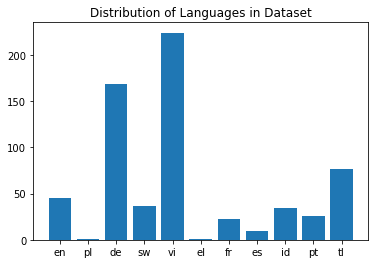

In [9]:
df['language'] = languages

inter_len = 645

plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

Je ne comprends pas les résultat :/

# NN


In [10]:
import string
from spacy.lang.en.stop_words import STOP_WORDS

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['‘ve',
 'with',
 'first',
 'would',
 'anything',
 'even',
 'of',
 'against',
 'myself',
 'formerly']

In [11]:
# Add to stopword some customs:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [12]:
# en_core_sci_lg  => https://allenai.github.io/scispacy/
# A full spaCy pipeline for biomedical data with a larger vocabulary and 600k word vectors.

import en_core_sci_lg

parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

C:\Users\rouxa\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_sci_lg' (0.2.4) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.7). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [13]:
import spacy

In [14]:
from tqdm import tqdm
tqdm.pandas() #to display progress bar
df["processed_abstract"] = df["Abstract2"].progress_apply(spacy_tokenizer)

100%|██████████| 645/645 [00:12<00:00, 52.32it/s]


In [15]:
df

,index,Title,Abstract,Body,RefTo,Authors,RefBy,DatePub,url,LibName,Similar,Abstract2,Title2,language,processed_abstract
0,doi:10.1016/j.jhep.2020.01.028.,[Full-length 5'RACE identifies all major HBV t...,[Background & aims: Covalen...,,,"{'Name': ['Bernd Stadelmayer', 'Audrey Diederi...",,2020 Feb 20,/32087349/,PubMed,,Background & aims: Covalent...,Full-length 5'RACE identifies all major HBV tr...,de,background aim covalently close circular dna c...
1,doi:10.3390/biom11121822.,[RNR-R2 Upregulation by a Short Non-Coding Vir...,[DNA viruses require dNTPs for replication and...,,,"{'Name': ['Karin Broennimann', 'Inna Ricardo-L...",,,/34944466/,PubMed,,DNA viruses require dNTPs for replication and ...,RNR-R2 Upregulation by a Short Non-Coding Vira...,de,dna virus require dntps replication develope d...
2,doi:10.3748/wjg.v27.i41.7144.,[Cross-sectional evaluation of circulating hep...,[Background: Different form...,,,"{'Name': ['Selene Garcia-Garcia', 'Maria Franc...",,,/34887634/,PubMed,,Background: Different forms...,Cross-sectional evaluation of circulating hepa...,de,background different form pregenomic hepatitis...
3,doi:10.3390/biomedicines9111701.,[Canonical and Divergent N-Terminal HBx Isofor...,[Hepatitis B virus (HBV) X protein (HBx) is a ...,,,"{'Name': ['Sergio Hernández', 'Francisca Álvar...",,,/34829930/,PubMed,,Hepatitis B virus (HBV) X protein (HBx) is a v...,Canonical and Divergent N-Terminal HBx Isoform...,vi,hepatitis b virus hbv x protein hbx viral regu...
4,doi:10.3389/fmed.2021.754709.,[Advances in Multi-Omics Applications in HBV-A...,[Hepatitis B virus (HBV) specifically infects ...,,,"{'Name': ['Dawei Cui', 'Wei Li', 'Daixi Jiang'...",,eCollection 2021,/34660653/,PubMed,,Hepatitis B virus (HBV) specifically infects l...,Advances in Multi-Omics Applications in HBV-As...,vi,hepatitis b virus hbv specifically infect live...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,doi:10.1038/s41568-018-0034-3.,[Targeting ATR in cancer],[The chemical treatment of cancer started with...,,,"{'Name': ['Emilio Lecona', 'Oscar Fernandez-Ca...",,,/29899559/,PubMed,,The chemical treatment of cancer started with ...,Targeting ATR in cancer,vi,chemical treatment cancer start realization dn...
656,doi:10.4161/15384101.2014.960729.,[Depletion of ATR selectively sensitizes ATM-d...,[DNA damage response (DDR) to double strand br...,,,"{'Name': ['Yuxia Cui', 'Stela S Palii', 'Cynth...",,,/25483091/,PubMed,,DNA damage response (DDR) to double strand bre...,Depletion of ATR selectively sensitizes ATM-de...,de,dna damage response ddr double strand break co...
657,doi:10.3390/cancers13194834.,[Mechanisms of Cancer Cell Death: Therapeutic ...,[Pancreatic ductal adenocarcinoma (PDAC) is a ...,,,"{'Name': ['Hannah Pook', 'Siim Pauklin', 'Hann...",,,/34638318/,PubMed,,Pancreatic ductal adenocarcinoma (PDAC) is a t...,Mechanisms of Cancer Cell Death: Therapeutic I...,tl,pancreatic ductal adenocarcinoma pdac type can...
658,doi:10.3390/pharmaceutics14010137.,[Gene Therapy Using Nanocarriers for Pancreati...,[Pancreatic ductal adenocarcinoma (PDAC) is on...,,,"{'Name': ['Eun-Jeong Won', 'Hyeji Park', 'Tae-...",,,/35057033/,PubMed,,Pancreatic ductal adenocarcinoma (PDAC) is one...,Gene Therapy Using Nanocarriers for Pancreatic...,tl,pancreatic ductal adenocarcinoma pdac lethal c...


# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [ ]:
text = df['processed_abstract'].values
max_features = 2**12

X = vectorize(text, max_features)

ValueError: empty vocabulary; perhaps the documents only contain stop words